In [165]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import sklearn
import statsmodels.api as sm

from datetime import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

%matplotlib inline

plt.style.use('seaborn-whitegrid')

### __FIRST PART__

#### Load dataSet

In this session we are going to import the dataset with Pandas and we will see the main aspects of the dataset.

#### Description of table Columns:
- __Data__: the first time since the job contract started [day/month/year]
- __Genere__:sex of the worker [M: Male, F: Female]
- __Eta__: age of the worker [years]
- __Settore Economico Dettaglio__: business sector of the worker
- __Titolo Studio__: qualification of the worker
- __Contratto__: type of worker's contract
- __Provincia Impresa__: company headquarters
- __Italiano__: worker's nationality

In [166]:
Rapporti_Lavoro_Cessati_DF = pd.read_csv('Rapporti_di_lavoro_cessati.csv')

In [167]:
Rapporti_Lavoro_Cessati_DF

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,02/04/2019,M,20,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
1,08/06/2018,F,28,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
2,02/02/2016,F,20,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/01/2015,M,59,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,09/08/2017,M,61,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
...,...,...,...,...,...,...,...,...,...
3741389,05/11/2018,M,19,Fabbricazione di altri elementi in legno e di ...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA
3741390,09/04/2017,M,67,Altra istruzione secondaria di secondo grado d...,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA
3741391,08/05/2015,M,59,Costruzione di edifici residenziali e non resi...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO
3741392,10/10/2016,M,26,Installazione di altre macchine ed apparecchia...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


In [168]:
## We will see the number of rows and columns of the dataset
row = Rapporti_Lavoro_Cessati_DF.shape[0]
column = Rapporti_Lavoro_Cessati_DF.shape[1]
print(f'Rows {row}')
print(f'Column {column}')

Rows 3741394
Column 9


In [169]:
## We will see the values type of the columns
Rapporti_Lavoro_Cessati_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741394 entries, 0 to 3741393
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 256.9+ MB


__General data view__

In this paragraph we will explore the dataset with a global analysis. It includes:
1. Description in a single column: We will display the different values (e.g. count, average age, values type...) associated with the 'ETA' column.
2. Histogram visualization of the different age groups distribution.
3. Distribution for gender.
4. Through a pie chart we will see the distribution of the different 'PROVINCIAIMPRESA'.
5. Finally, we will display the number of jobs by gender for each city.

1. __Description in a single column__

In [170]:
Rapporti_Lavoro_Cessati_DF['ETA'].describe().round(2)

count    3741394.00
mean          38.11
std           12.62
min            0.00
25%           28.00
50%           37.00
75%           47.00
max          621.00
Name: ETA, dtype: float64

2. __Dristribution of 'ETA'__

Text(0, 0.5, 'Density')

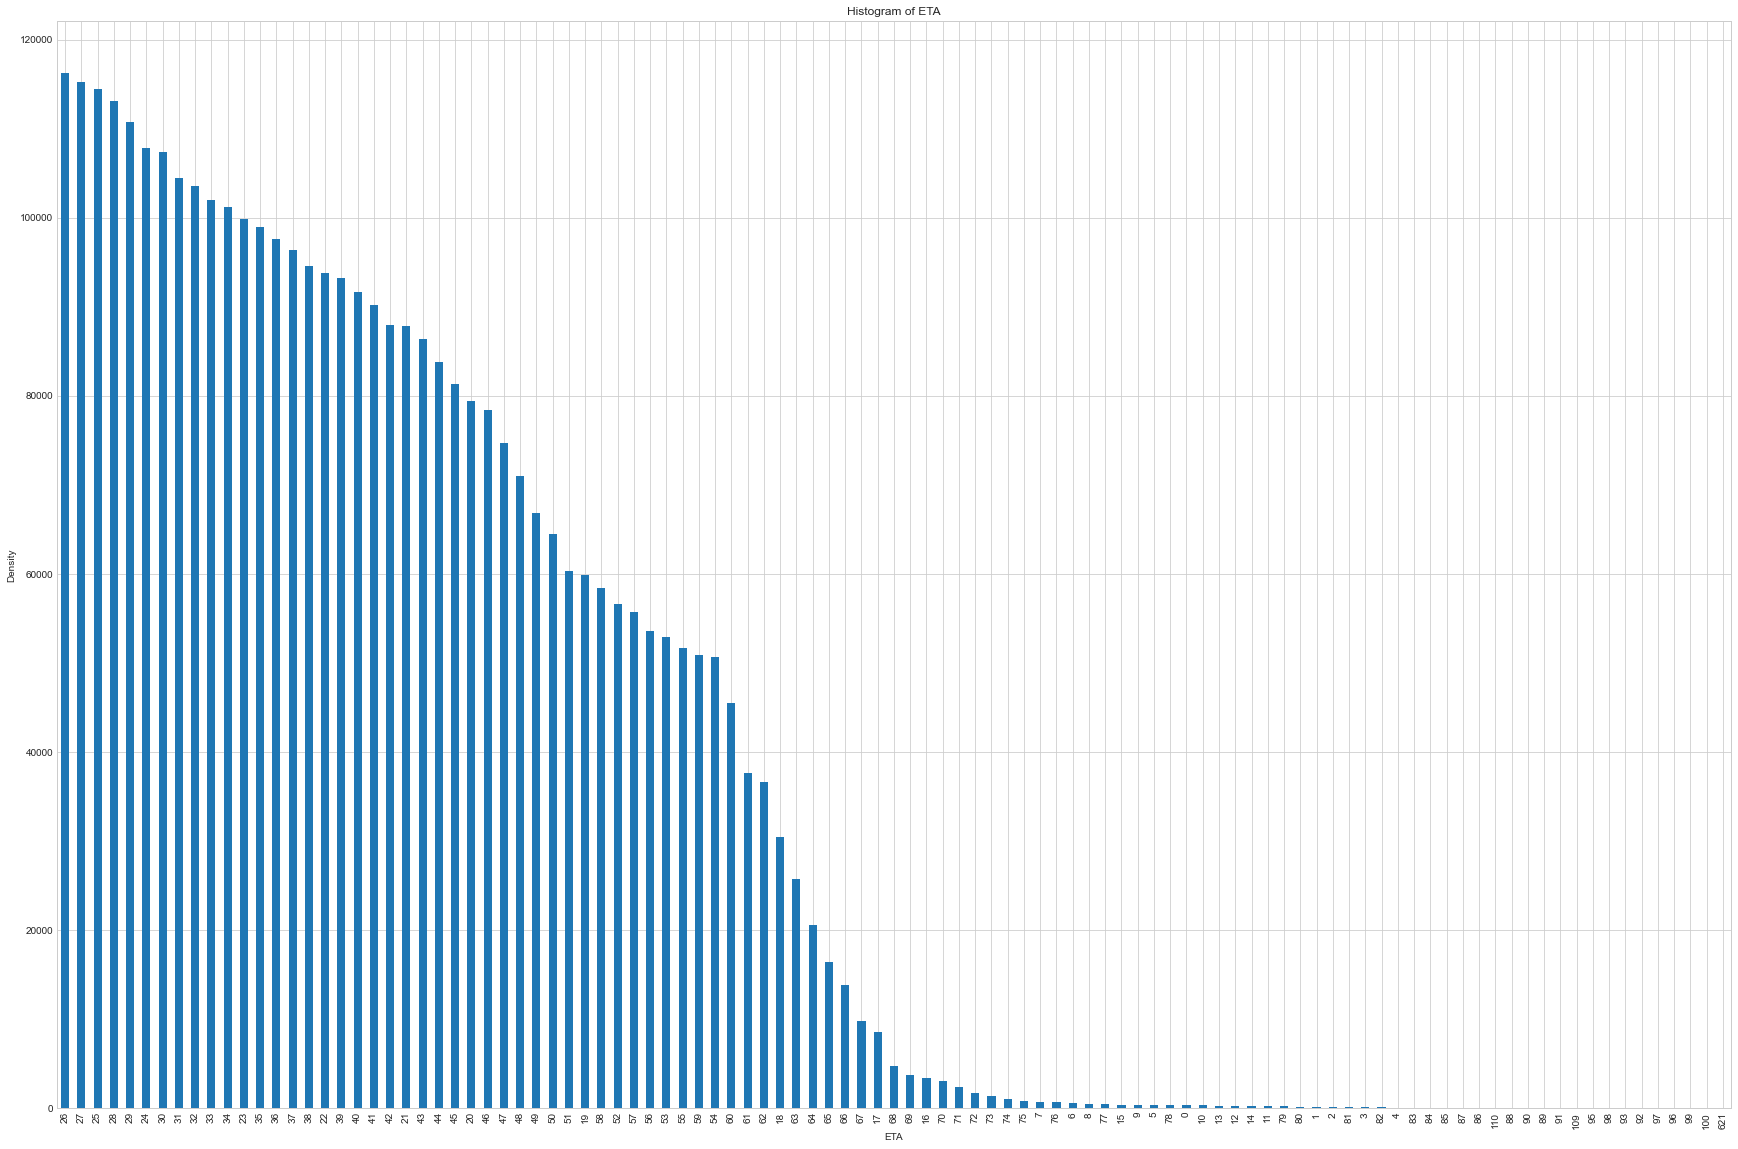

In [171]:
Rapporti_Lavoro_Cessati_DF['ETA'].value_counts().plot(kind='bar', figsize=(30, 20))
plt.title('Histogram of ETA')
plt.xlabel('ETA')
plt.ylabel('Density')

3. __Distribution of 'GENERE'__

Text(0.5, 1.0, 'Distribution for GENERE')

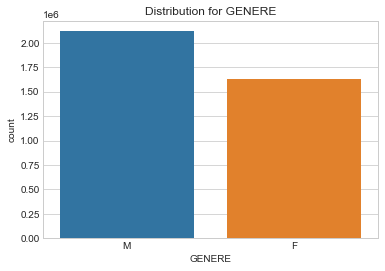

In [172]:
sns.countplot(x='GENERE', data=Rapporti_Lavoro_Cessati_DF)
plt.title('Distribution for GENERE')

<AxesSubplot:xlabel='count', ylabel='PROVINCIAIMPRESA'>

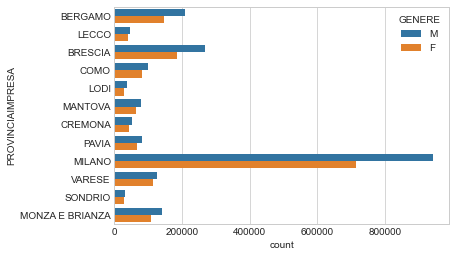

In [173]:
sns.countplot(y='PROVINCIAIMPRESA', hue='GENERE', data=Rapporti_Lavoro_Cessati_DF)

4. __Pie chart 'PROVINCIAIMPRESA'__

MILANO             1658400
BRESCIA             454133
BERGAMO             356196
MONZA E BRIANZA     248667
VARESE              239937
COMO                182745
PAVIA               147646
MANTOVA             142542
CREMONA              95434
LECCO                87255
LODI                 66423
SONDRIO              62016
Name: PROVINCIAIMPRESA, dtype: int64


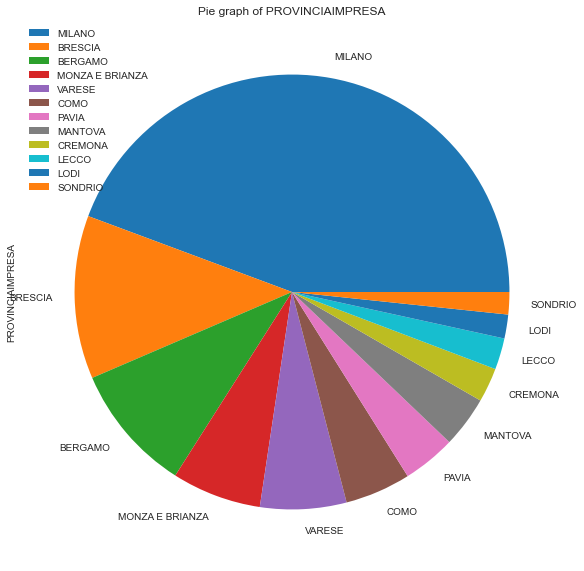

In [174]:
Rapporti_Lavoro_Cessati_DF['PROVINCIAIMPRESA'].value_counts().plot(kind='pie', figsize=(10, 10))
plt.title('Pie graph of PROVINCIAIMPRESA')
plt.legend(loc=2)

print(Rapporti_Lavoro_Cessati_DF['PROVINCIAIMPRESA'].value_counts())

5. __Distribution of Job for gender for each city__

Text(0.5, 1.0, 'Percentage of distribution in cities by gender')

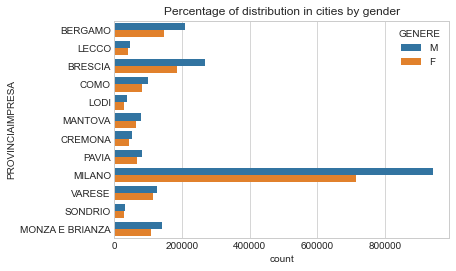

In [175]:
sns.countplot(y='PROVINCIAIMPRESA', hue='GENERE', data=Rapporti_Lavoro_Cessati_DF)
plt.title('Percentage of distribution in cities by gender')

### __Data cleaning and preparing__

The initial analysis show an  ambiguities in the data (e.g. zero years old people, NAN values, ...).

In this session we will clean the dataSet through:

1. __Elimination of people with wrong age.__
2. __Elimination of all null values.__

1. __Elimination of people with wrong age.__

In this analysis we will take a range of age between 18 and 69

In [176]:
dropAgeC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['ETA'] >= 70) | (Rapporti_Lavoro_Cessati_DF['ETA'] <= 17)].index

In [177]:
Rapporti_Lavoro_Cessati_DF.drop(dropAgeC, inplace=True)

2. __Elimination of all null values.__

In [178]:
colC = ['DATA', 'GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 
       'MODALITALAVORO', 'PROVINCIAIMPRESA','ITALIANO']

for column in colC:
    Rapporti_Lavoro_Cessati_DF.loc[Rapporti_Lavoro_Cessati_DF[column] == '?', column] = np.nan

Rapporti_Lavoro_Cessati_DF.dropna(axis = 0, inplace = True) 

### __Data analysis before and during Covid19__

After the previous analysis of the dataset, we will fill out the distribution of:
1. __Global Data Analysis.__
2. __Data Analysis Before covid.__
3. __Data Analysis During covid.__

NOTE: during the analysis of the business contract distribution, we will consider the same range of time

In [179]:
dataC=Rapporti_Lavoro_Cessati_DF['DATA']

In [180]:
yearC=[]
monthC=[]
dayC=[]
data_CompleteC=[]
for i in dataC:
    data1C=datetime.strptime(i, "%d/%m/%Y")
    yearC.append(data1C.year)
    monthC.append(data1C.month)
    dayC.append(data1C.day)
    data_CompleteC.append(data1C)

In [181]:
Rapporti_Lavoro_Cessati_DF.drop(['DATA'], axis=1, inplace=True)

In [182]:
Rapporti_Lavoro_Cessati_DF['DATA'] = data_CompleteC
Rapporti_Lavoro_Cessati_DF['YEAR'] = yearC
Rapporti_Lavoro_Cessati_DF['MONTH'] = monthC
Rapporti_Lavoro_Cessati_DF['DAY'] = dayC

In [183]:
Rapporti_Lavoro_Cessati_DF

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,DATA,YEAR,MONTH,DAY
0,M,20.0,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2019-04-02,2019,4,2
1,F,28.0,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2018-06-08,2018,6,8
2,F,20.0,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2016-02-02,2016,2,2
3,M,59.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2015-01-12,2015,1,12
4,M,61.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2017-08-09,2017,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...
3741389,M,19.0,Fabbricazione di altri elementi in legno e di ...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2018-11-05,2018,11,5
3741390,M,67.0,Altra istruzione secondaria di secondo grado d...,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2017-04-09,2017,4,9
3741391,M,59.0,Costruzione di edifici residenziali e non resi...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO,2015-05-08,2015,5,8
3741392,M,26.0,Installazione di altre macchine ed apparecchia...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2016-10-10,2016,10,10


1. __Global Data Analysis__

In [184]:
global_Data_YEARC = Rapporti_Lavoro_Cessati_DF.groupby(['YEAR']).MONTH.count()

In [185]:
global_Data_MONTHC = Rapporti_Lavoro_Cessati_DF.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

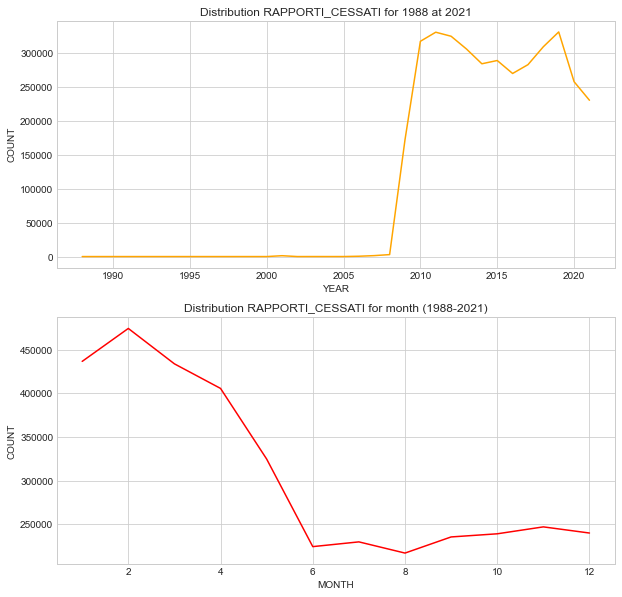

In [186]:
## crete a different subplot for two dataAnalysis
figure = plt.figure(figsize=(10, 10))

x_dataYC = global_Data_YEARC.index
y_dataYC = global_Data_YEARC.values

x_dataMC = global_Data_MONTHC.index
y_dataMC = global_Data_MONTHC.values

plt.subplot(2, 1, 1)
plt.plot(x_dataYC, y_dataYC, color='orange')
plt.title('Distribution RAPPORTI_CESSATI for 1988 at 2021')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataMC, y_dataMC, color='red')
plt.title('Distribution RAPPORTI_CESSATI for month (1988-2021)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [187]:
data_global_MC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['GENERE'] == 'M')]
data_global_FC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['GENERE'] == 'F')]

In [188]:
global_Data_YEAR_MC = data_global_MC.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_FC = data_global_FC.groupby(['MONTH']).GENERE.count()

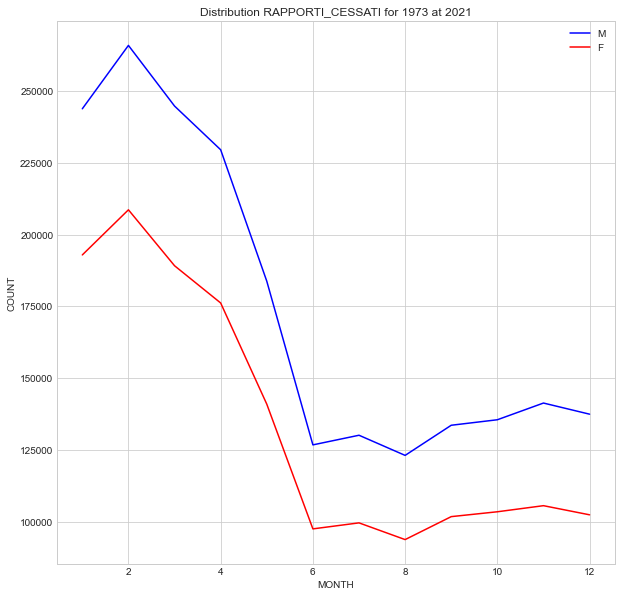

In [189]:

figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_MC = global_Data_YEAR_MC.index
y_dataY_MC = global_Data_YEAR_MC.values

x_dataY_FC = global_Data_YEAR_FC.index
y_dataY_FC = global_Data_YEAR_FC.values


ax.plot(x_dataY_MC, y_dataY_MC, color='blue', label='M')
ax.plot(x_dataY_FC, y_dataY_FC, color='red', label='F')
plt.title('Distribution RAPPORTI_CESSATI for 1973 at 2021')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()

2. __Data Analysis Before covid__

In [190]:
data_Before_CovidC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] == 2018) | 
                                         (Rapporti_Lavoro_Cessati_DF['YEAR'] == 2019)]

In [191]:
global_Data_YEAR_Before_CovidC = data_Before_CovidC.groupby(['YEAR']).MONTH.count()

In [192]:
global_Data_MONTH_Before_CovidC = data_Before_CovidC.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

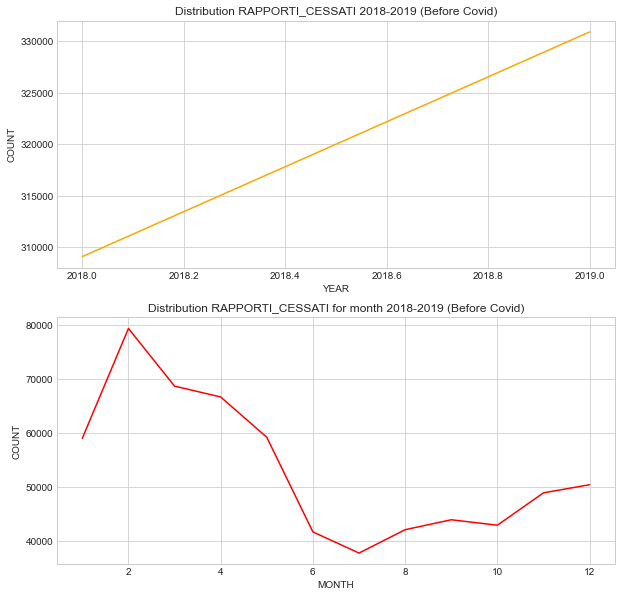

In [193]:

figure = plt.figure(figsize=(10, 10))

x_dataY_BCC = global_Data_YEAR_Before_CovidC.index
y_dataY_BCC = global_Data_YEAR_Before_CovidC.values

x_dataM_BCC = global_Data_MONTH_Before_CovidC.index
y_dataM_BCC = global_Data_MONTH_Before_CovidC.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_BCC, y_dataY_BCC, color='orange')
plt.title('Distribution RAPPORTI_CESSATI 2018-2019 (Before Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_BCC, y_dataM_BCC, color='red')
plt.title('Distribution RAPPORTI_CESSATI for month 2018-2019 (Before Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [194]:
data_Before_Covid_MC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] == 2018) | 
                                         (Rapporti_Lavoro_Cessati_DF['YEAR'] == 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'M')]

data_Before_Covid_FC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] == 2018) | 
                                         (Rapporti_Lavoro_Cessati_DF['YEAR'] == 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'F')]

In [195]:
global_Data_YEAR_before_Covid_MC = data_Before_Covid_MC.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_before_Covid_FC = data_Before_Covid_FC.groupby(['MONTH']).GENERE.count()

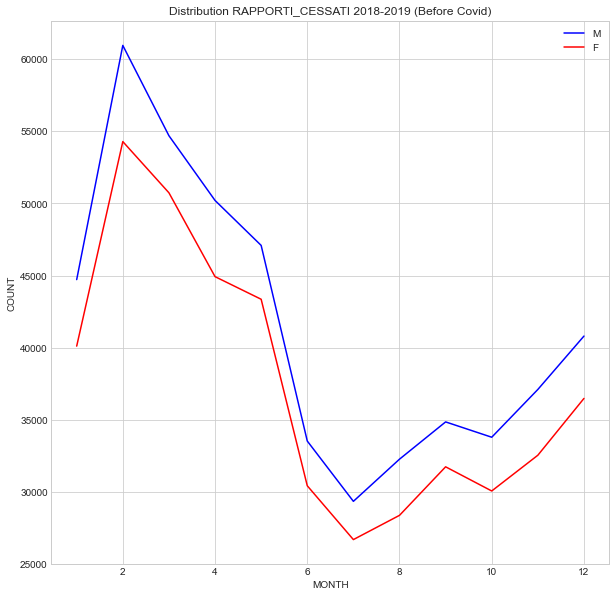

In [196]:

figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_BC_MC = global_Data_YEAR_before_Covid_MC.index
y_dataY_BC_MC = global_Data_YEAR_before_Covid_MC.values

x_dataY_BC_FC = global_Data_YEAR_before_Covid_FC.index
y_dataY_BC_FC = global_Data_YEAR_before_Covid_FC.values


ax.plot(x_dataY_BC_MC, y_dataY_BC_MC, color='blue', label='M')
ax.plot(x_dataY_BC_FC, y_dataY_BC_FC, color='red', label='F')
plt.title('Distribution RAPPORTI_CESSATI 2018-2019 (Before Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()

3. __Data Analysis During covid__

In [197]:
data_during_CovidC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] > 2019)]

In [198]:
global_Data_YEAR_during_CovidC = data_during_CovidC.groupby(['YEAR']).MONTH.count()

In [199]:
global_Data_MONTH_during_CovidC = data_during_CovidC.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

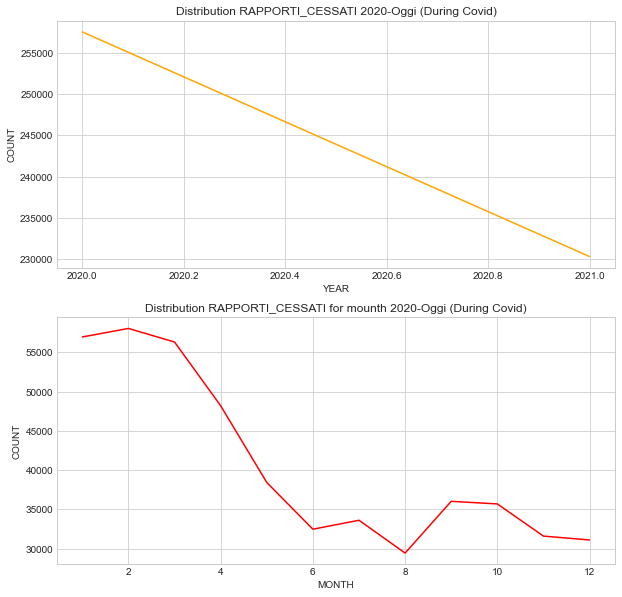

In [200]:

figure = plt.figure(figsize=(10, 10))

x_dataY_DCC = global_Data_YEAR_during_CovidC.index
y_dataY_DCC = global_Data_YEAR_during_CovidC.values

x_dataM_DCC = global_Data_MONTH_during_CovidC.index
y_dataM_DCC = global_Data_MONTH_during_CovidC.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_DCC, y_dataY_DCC, color='orange')
plt.title('Distribution RAPPORTI_CESSATI 2020-Oggi (During Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_DCC, y_dataM_DCC, color='red')
plt.title('Distribution RAPPORTI_CESSATI for mounth 2020-Oggi (During Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [201]:
data_during_Covid_MC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] > 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'M')]
data_during_Covid_FC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] > 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'F')]

In [202]:
global_Data_YEAR_during_Covid_MC = data_during_Covid_MC.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_during_Covid_FC = data_during_Covid_FC.groupby(['MONTH']).GENERE.count()

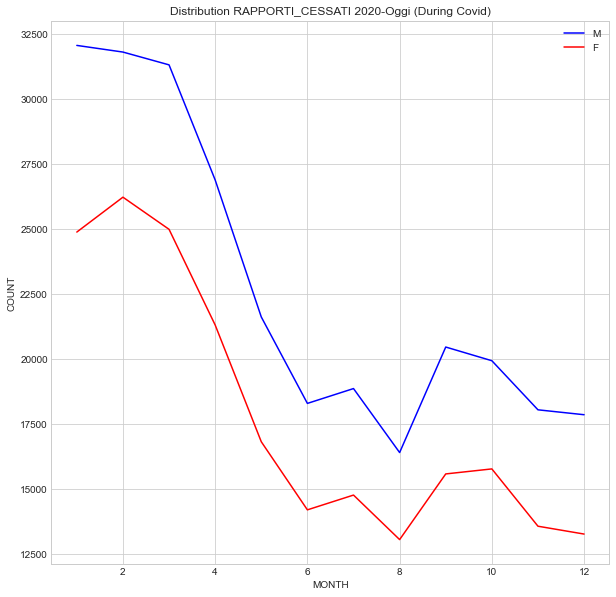

In [203]:

figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_DC_MC = global_Data_YEAR_during_Covid_MC.index
y_dataY_DC_MC = global_Data_YEAR_during_Covid_MC.values

x_dataY_DC_FC = global_Data_YEAR_during_Covid_FC.index
y_dataY_DC_FC = global_Data_YEAR_during_Covid_FC.values


ax.plot(x_dataY_DC_MC, y_dataY_DC_MC, color='blue', label='M')
ax.plot(x_dataY_DC_FC, y_dataY_DC_FC, color='red', label='F')
plt.title('Distribution RAPPORTI_CESSATI 2020-Oggi (During Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()

______


## __Time Series analysis__

Previously, we have analyzed 'Rapporti_di_lavoro_cessati' dataSet in terms of:
- __Globally__
- __Before Covid 19 pandemic__
- __During Covid 19 pandemic__

In the following paragraphs, we are going to view the trend of these time series. This analysis want to outlines:
1. __Global Analysis__
2. __Analysis during coviid 19 pandemic__

In particular:
1. __View of boxPlot of month-wise(seasonal) ans year-wise(Trend)__
2. __View of Additive and Multiplicative Patterns__
3. __Stationarity test__
4. __Time Series detrend__
5. __Deseasonalize__
6. __Time Series forecasting__

In [204]:
def test_stationarity(timeseries):
    """
    Check Stationariety of time series.
    Please use np.array or pd.series as Input with your TS data only
    """
    #Convert numpy array to pandas serie
    if type(timeseries) is np.ndarray:
        df_timeseries = pd.Series(timeseries) 
        
    try:
        #Determing rolling statistics
        rolmean = df_timeseries.rolling(window=12).mean()
        rolstd = df_timeseries.rolling(window=12).std()

        #Plot rolling statistics:
        orig = plt.plot(timeseries, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)

        #Perform Dickey-Fuller test:
        print('Results of Dickey-Fuller Test:')

        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        
        # print(dfoutput)
    
        return dftest, dfoutput
    except Exception as message:
        print(f"Impossible to calc the stationariery of your TS: {message}")
        return None, None

In [205]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [206]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

## 1. Global  Analysis

This chapter describes the Time Series of the global dataset analyzed before. In particular we have created two new subset between 2009 and 2021 year in order to clean the Time Series from null data.

In [207]:
global_Data_YEAR = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR']>2008)]
global_Data_YEAR_1 = global_Data_YEAR.groupby(['DATA']).YEAR.count()
global_Data_YEAR_2 = global_Data_YEAR.groupby(['YEAR']).MONTH.count()

global_Data_YEAR_1 = pd.DataFrame({'date': global_Data_YEAR_1.index,
                                 'value': global_Data_YEAR_1.values})

global_Data_YEAR_2 = pd.DataFrame({'date': global_Data_YEAR_2.index,
                                 'value': global_Data_YEAR_2.values})

global_Data_YEAR_1['year'] = [d.year for d in global_Data_YEAR_1.date]
global_Data_YEAR_1['month'] = [d.strftime('%b') for d in global_Data_YEAR_1.date]
years = global_Data_YEAR_1['year'].unique()

1.1. __BoxPlot of Month-wise(Seasonal) and Year-wise(trend)__

We have group the data at seasonal intervals in order to see how the values are distributed in year and month and how it compares over time.

- The first box plot represent the trend over the years --> Trend
- The second box plot represent the  trend in the various month for all years --> Seasonality

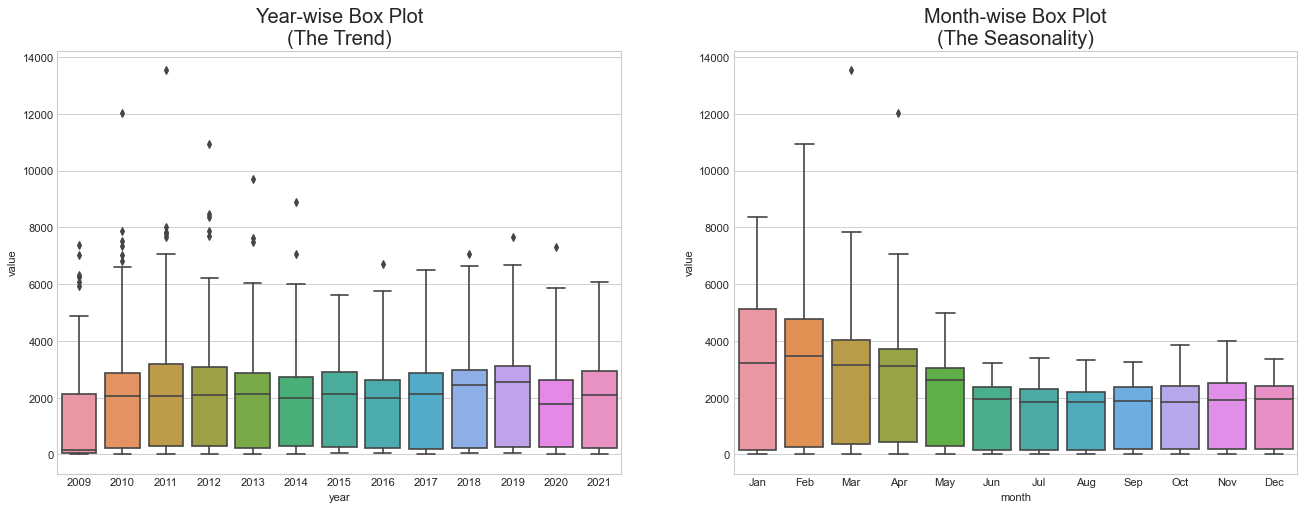

In [208]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=global_Data_YEAR_1, ax=axes[0])
sns.boxplot(x='month', y='value', data=global_Data_YEAR_1, ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

1.2. __Additive and moltiplicative patterns__

Depending on the nature of the trend and seasonality, this time series has been modeled as an additive and multiplicative.

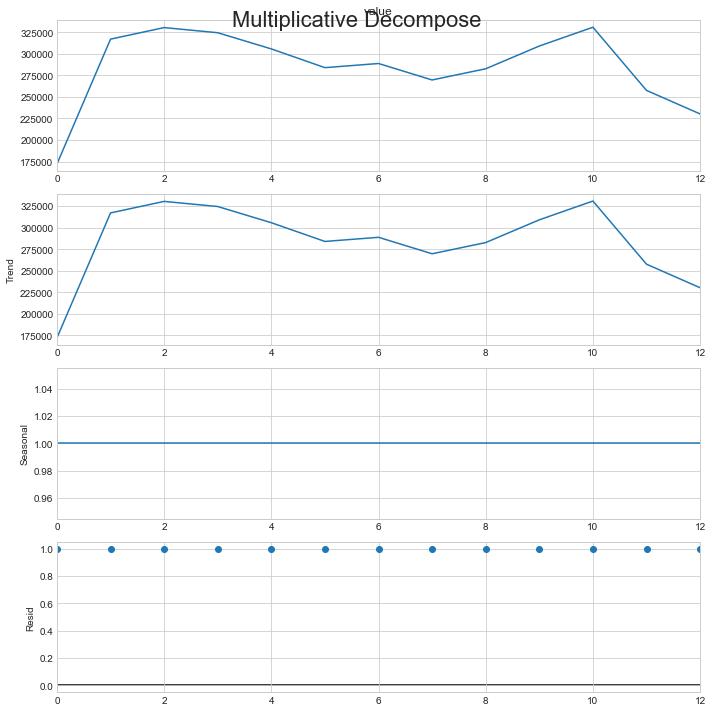

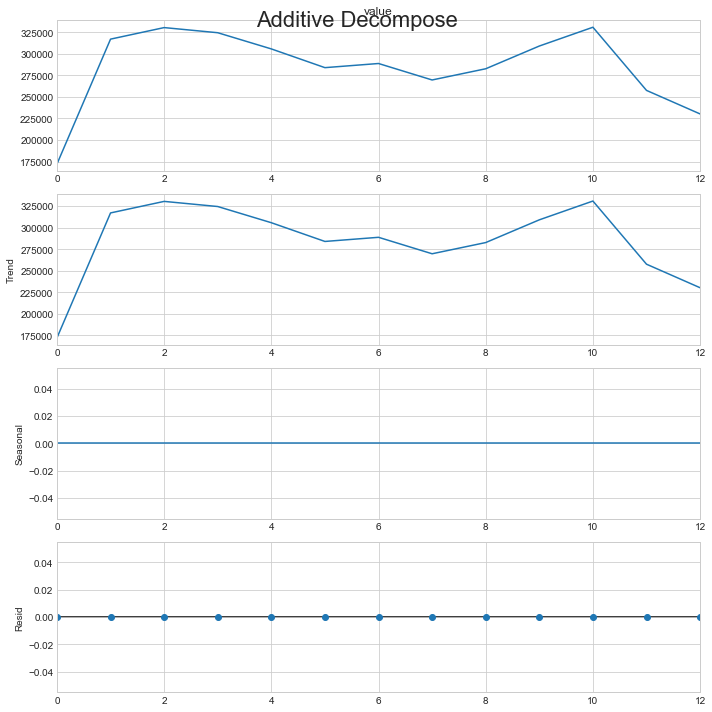

In [209]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(x=global_Data_YEAR_2['value'], model='multiplicative', extrapolate_trend='freq', period=1)

# Additive Decomposition
result_add = seasonal_decompose(x=global_Data_YEAR_2['value'], model='additive', extrapolate_trend='freq', period=1)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

1.3. __Stationarity test__

This analysis want to test if our Time Series has constant statistical properties over time. 

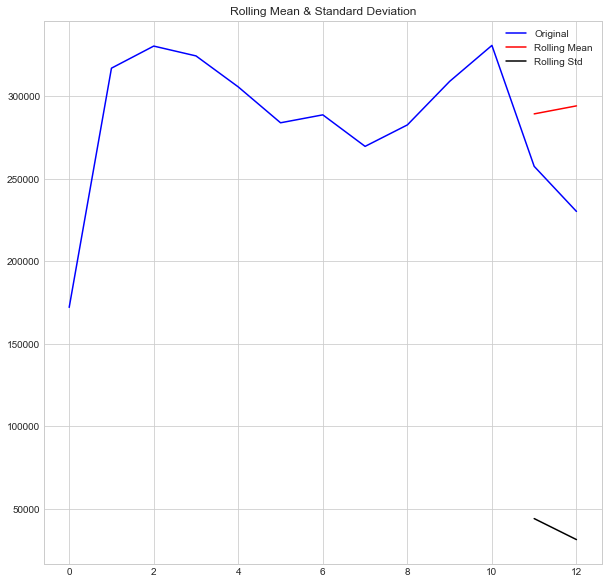

Results of Dickey-Fuller Test:


Test Statistic                 -1.830784
p-value                         0.365289
#Lags Used                      1.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64

In [210]:
dftest, dfoutput = test_stationarity(global_Data_YEAR_2['value'].values)
dfoutput

1.4. __Time Series Detrend__

We have detrend our time series in order to remove the trend component from it. 

We have used two method:
- Subtract the line of best fit from the time series mean.
- Subtract the line of the best from the trend component obtained from time series decomposition we saw earlier.

N.B. we obtained the line of the best fit from the time series through a linear regression model.

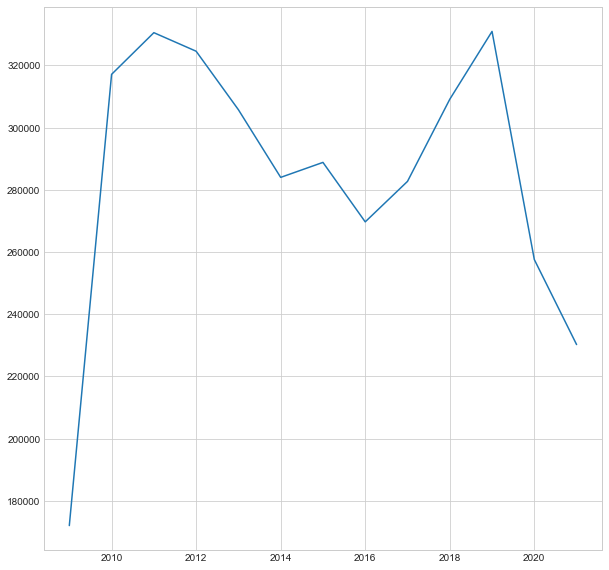

In [211]:
#This is our TS
df_detrend = global_Data_YEAR_2.copy()
df_detrend.index = df_detrend.date
df_detrend = df_detrend.drop('date',axis=1)
plt.plot(df_detrend.index, df_detrend.value)

Text(0.5, 1.0, 'Ended contract detrended by subtracting the least squares fit')

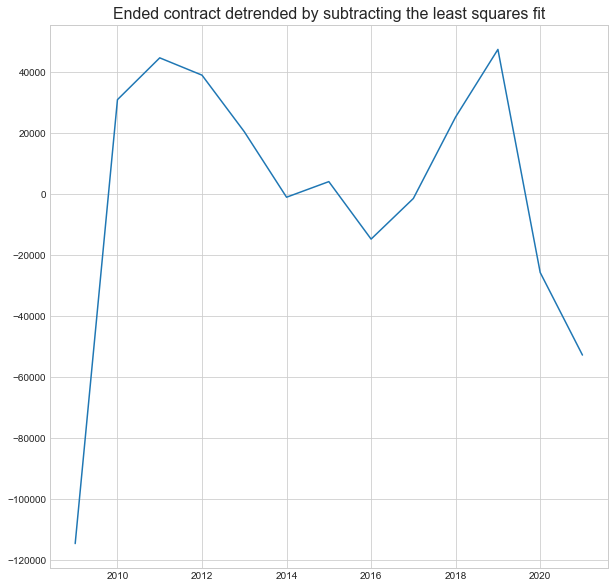

In [212]:
# Using scipy: Subtract the line of best fit
detrended = signal.detrend(df_detrend.value.values)
plt.plot(df_detrend.index, detrended)
plt.title('Ended contract detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Ended contract detrended by subtracting the trend component (multiplicative)')

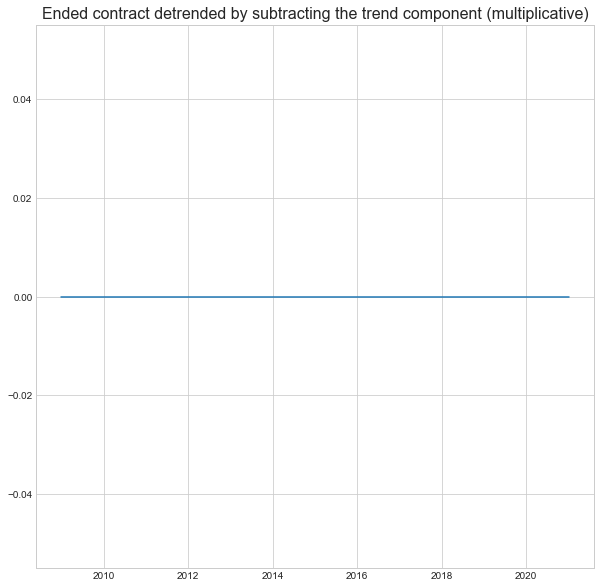

In [213]:
# Using statmodels: Subtracting the Trend Component.
result_mul = seasonal_decompose(x=df_detrend['value'], model='multiplicative', extrapolate_trend='freq', period=1)
detrended = df_detrend.value.values - result_mul.trend
plt.plot(df_detrend.index, detrended)
plt.title('Ended contract detrended by subtracting the trend component (multiplicative)', fontsize=16)

Text(0.5, 1.0, 'Ended contract detrended by subtracting the trend component (additive)')

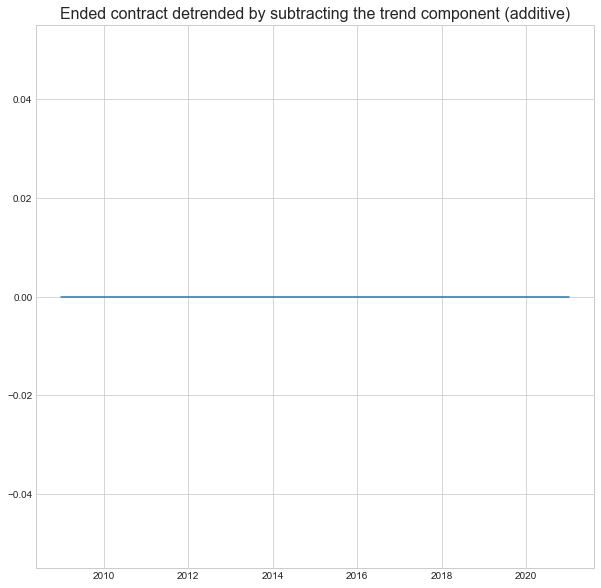

In [214]:
# Using statmodels: Subtracting the Trend Component.
result_mul = seasonal_decompose(df_detrend['value'], model='additive', extrapolate_trend='freq', period=1)
detrended = df_detrend.value.values - result_mul.trend
plt.plot(df_detrend.index, detrended)
plt.title('Ended contract detrended by subtracting the trend component (additive)', fontsize=16)

1.5. __Deseasonalized__

This pharagraph describes the seasonal difference of the series by subtracting the value of previous season from the current value.

[]

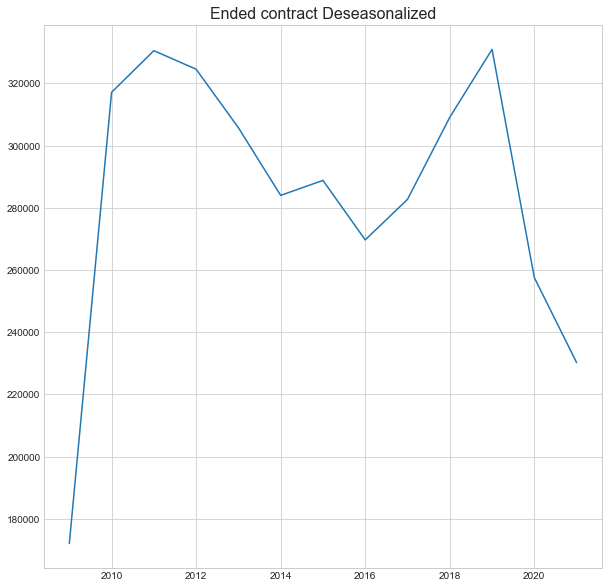

In [215]:
# Subtracting the Trend Component.
df_deseason = df_detrend.copy()

# Time Series Decomposition
result_mul = seasonal_decompose(df_deseason['value'], model='multiplicative', extrapolate_trend='freq', period=1)

# Deseasonalize
deseasonalized = df_deseason.value.values / result_mul.seasonal

# Plot
plt.plot(df_deseason.index, deseasonalized)
plt.title('Ended contract Deseasonalized', fontsize=16)
plt.plot()

1.6. __Time Series Forecasting__

We have used the approximate entropy in order to quantify the regularity and unpredictability of fluctuations in our time series (The higher the approximate entropy, the more difficult it is to forecast it).

But we have also used the sample entropy because it is more consistent in estimating the complexity even for smaller time series.

In [216]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

print(f'Dataset ended: {ApEn(global_Data_YEAR_2.value, m=2, r=0.2*np.std(global_Data_YEAR_2.value))}')     # 0.651
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

Dataset ended: 0.028513153103694844
0.2526718880418164
0.6793639424365034


In [217]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

print(f'Dataset ended: {SampEn(global_Data_YEAR_2.value, m=2, r=0.2*np.std(global_Data_YEAR_2.value))}')      # 0.78
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

Dataset ended: inf
1.0986122886681098
2.4336133554004498


C:\Users\Seryet\AppData\Local\Temp\ipykernel_22524\1392444303.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(_phi(m+1) / _phi(m))


______

# 2. Analysis during covid 19 pandemic

This chapter describes the Time Series of the 'During covid 19 pandemic' part analyzed before. In particular we have created two new subset between 2020 and 2021 year in order to clean the Time Series from null data.


In [218]:
global_Data_During_Covid = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR']>2019)]
global_Data_During_Covid = global_Data_During_Covid.groupby(['DATA']).YEAR.count()

global_Data_During_Covid = pd.DataFrame({'date': global_Data_During_Covid.index,
                                         'value': global_Data_During_Covid.values})

global_Data_During_Covid['year'] = [d.year for d in global_Data_During_Covid.date]
global_Data_During_Covid['month'] = [d.strftime('%b') for d in global_Data_During_Covid.date]
years = global_Data_During_Covid['year'].unique()

2.1. __BoxPlot of Mounth-wise(Seasonal) and Year-wise(trend)__

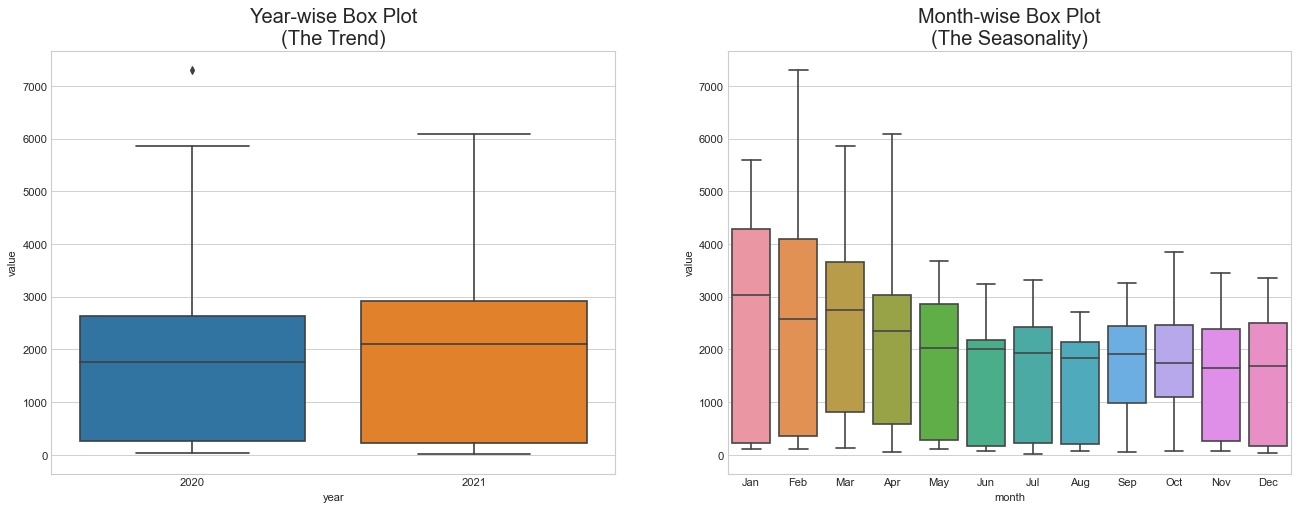

In [219]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=global_Data_During_Covid, ax=axes[0])
sns.boxplot(x='month', y='value', data=global_Data_During_Covid, ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

2.2. __Additive and moltiplicative patterns__

In [220]:
df_Mol_Add = global_Data_During_Covid.copy()
df_Mol_Add.index = df_Mol_Add['date']
df_Mol_Add= df_Mol_Add.drop(['date','year','month'],axis=1)

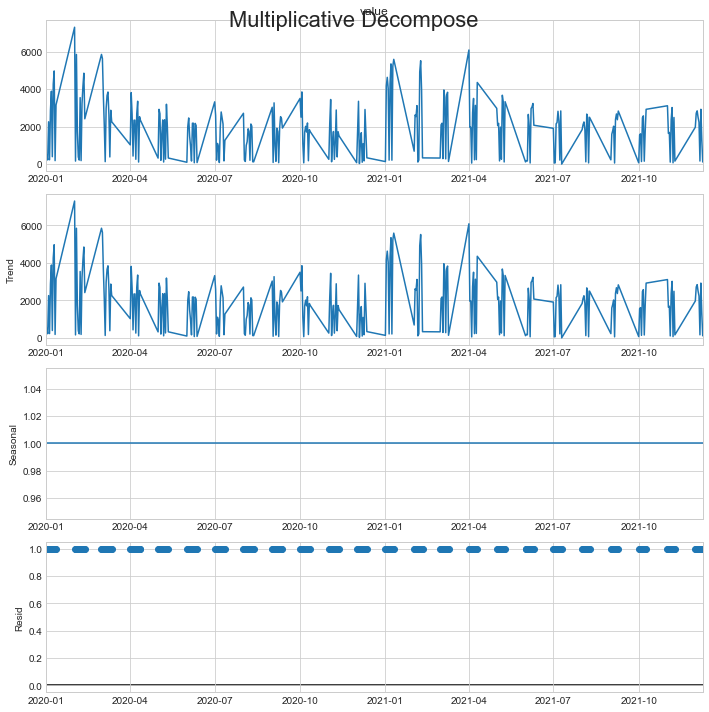

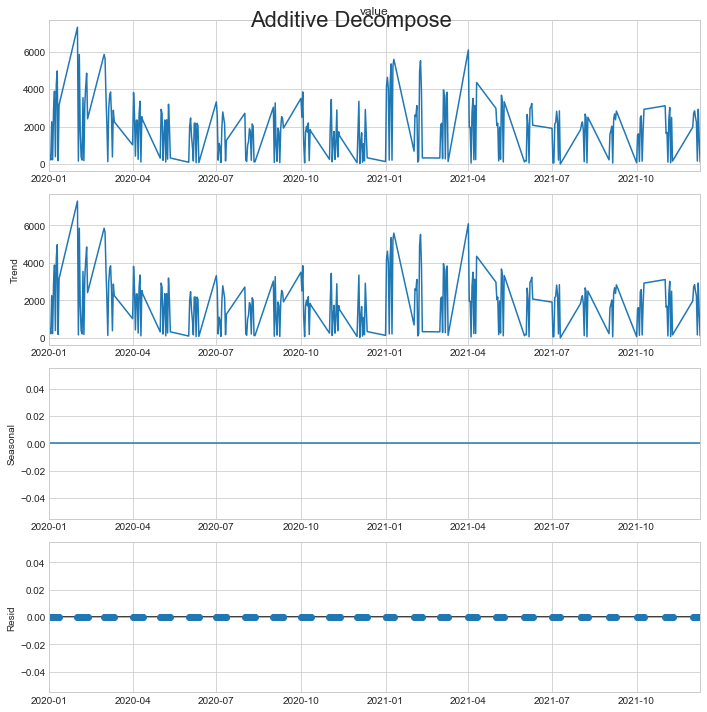

In [221]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(x=df_Mol_Add['value'], model='multiplicative', extrapolate_trend='freq', period=1)

# Additive Decomposition
result_add = seasonal_decompose(x=df_Mol_Add['value'], model='additive', extrapolate_trend='freq', period=1)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

2.3. __Stationarity Test__

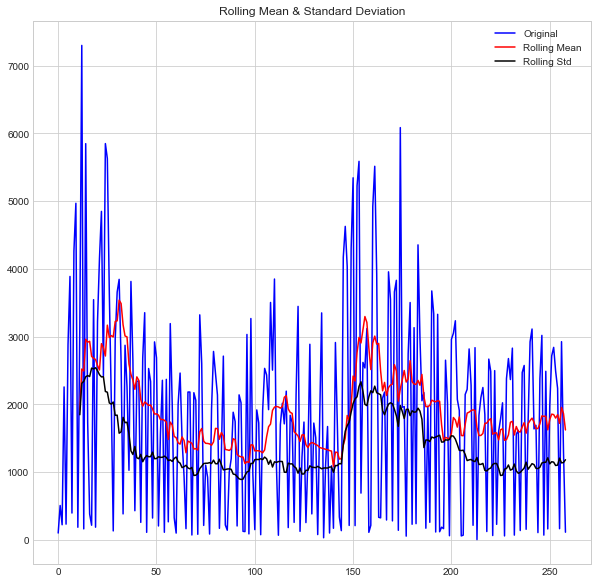

Results of Dickey-Fuller Test:


Test Statistic                  -2.773789
p-value                          0.062116
#Lags Used                      11.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64

In [222]:
dftest, dfoutput = test_stationarity(df_Mol_Add['value'].values)
dfoutput

2.4. __Time Series Detrend__

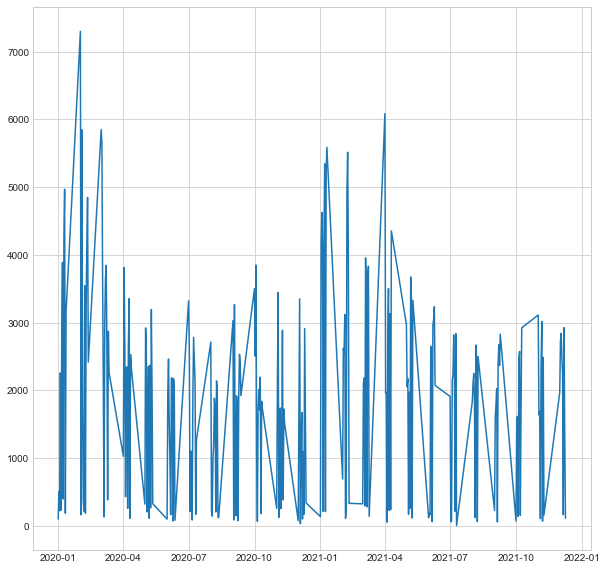

In [223]:
df_detrend = global_Data_During_Covid.copy()
df_detrend.index = df_detrend.date
df_detrend = df_detrend.drop('date',axis=1)
plt.plot(df_detrend.index, df_detrend.value)

Text(0.5, 1.0, 'Ended contract detrended by subtracting the least squares fit')

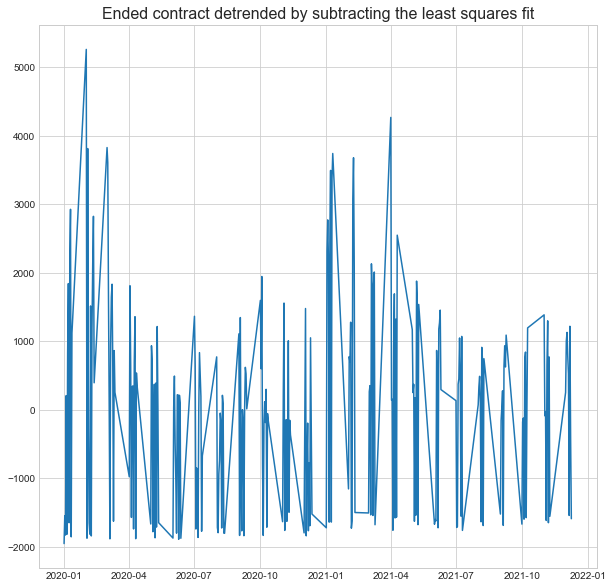

In [224]:
# Using scipy: Subtract the line of best fit
detrended = signal.detrend(df_detrend.value.values)
plt.plot(df_detrend.index, detrended)
plt.title('Ended contract detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Ended componant detrended by subtracting the trend component (multiplicative)')

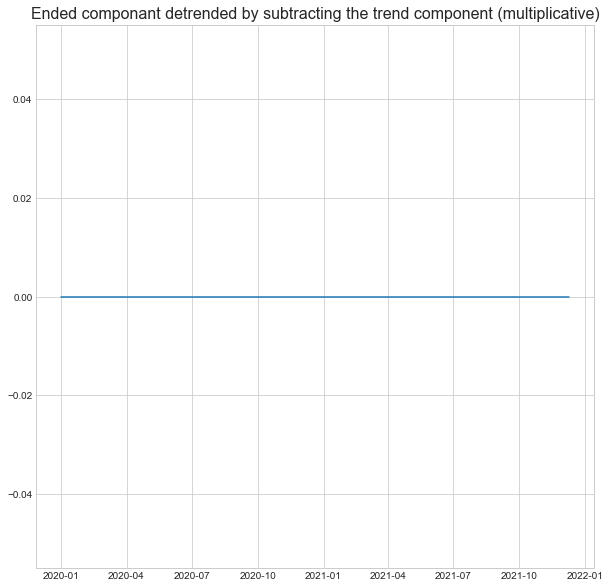

In [225]:
# Using statmodels: Subtracting the Trend Component.
result_mul = seasonal_decompose(x=df_detrend['value'], model='multiplicative', extrapolate_trend='freq', period=1)
detrended = df_detrend.value.values - result_mul.trend
plt.plot(df_detrend.index, detrended)
plt.title('Ended componant detrended by subtracting the trend component (multiplicative)', fontsize=16)

Text(0.5, 1.0, 'Ended contract detrended by subtracting the trend component (additive)')

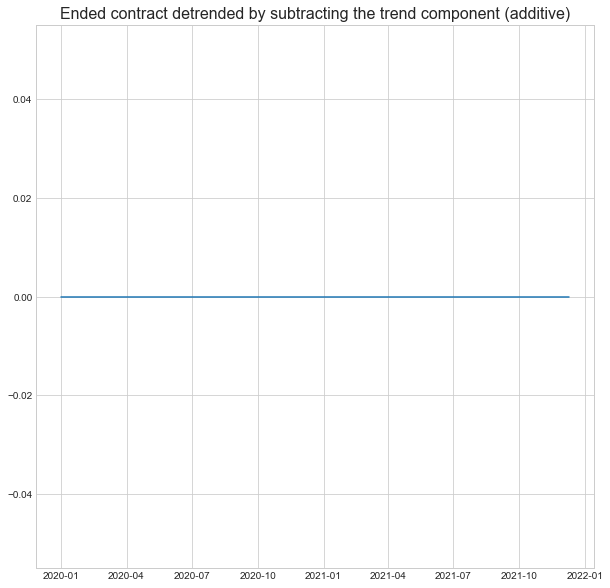

In [226]:
# Using statmodels: Subtracting the Trend Component.

result_mul = seasonal_decompose(df_detrend['value'], model='additive', extrapolate_trend='freq', period=1)
detrended = df_detrend.value.values - result_mul.trend
plt.plot(df_detrend.index, detrended)
plt.title('Ended contract detrended by subtracting the trend component (additive)', fontsize=16)

2.5. __Deseasonalize__

[]

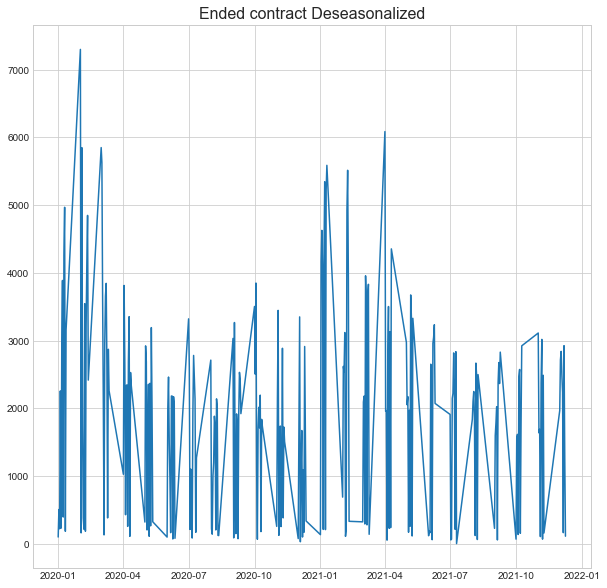

In [227]:
# Subtracting the Trend Component.
df_deseason = df_detrend.copy()

# Time Series Decomposition
result_mul = seasonal_decompose(df_deseason['value'], model='multiplicative', extrapolate_trend='freq', period=1)

# Deseasonalize
deseasonalized = df_deseason.value.values / result_mul.seasonal

# Plot
plt.plot(df_deseason.index, deseasonalized)
plt.title('Ended contract Deseasonalized', fontsize=16)
plt.plot()

2.6. __Time Series forecasting__

In [228]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

print(f'Dataset attivate: {ApEn(global_Data_During_Covid.value, m=2, r=0.2*np.std(global_Data_During_Covid.value))}')     # 0.651
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

Dataset attivate: 1.119816822308191
0.20877504452999984
0.6409635678573853


In [229]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

print(f'Dataset attivate: {SampEn(global_Data_During_Covid.value, m=2, r=0.2*np.std(global_Data_During_Covid.value))}')      # 0.78
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

Dataset attivate: 1.4865212402579724
inf
1.9459101490553135


C:\Users\Seryet\AppData\Local\Temp\ipykernel_22524\1392444303.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(_phi(m+1) / _phi(m))


______

### __Feature Engineering__

After manipulating data, cleaning null/ambiguous data and having a view of time series behaviour, now we are going to manipulated data in order to transform and adapt them to create the automatic learning model.   

This process is called Feature Engineering; it is important for the Machine Learning because some type of automatic learning don't support  token/String data but only number

Our goal is to identify in the dataSet the token/String data in order to transform them in to number type.

In [230]:
result_String = Rapporti_Lavoro_Cessati_DF.select_dtypes(include=['object', 'category'])

In [231]:
result_String.head(5)

,GENERE,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,M,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
1,F,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
2,F,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,M,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,M,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


### __Label encoder__

We used LabelEncoder to convert each class under specified feature to a numerical value.

In [236]:
df_Transform_End = Rapporti_Lavoro_Cessati_DF.copy()

In [237]:
class_Genere = preprocessing.LabelEncoder()
class_Genere.fit(df_Transform_End['GENERE'])
df_Transform_End['GENERE'] = class_Genere.transform(df_Transform_End['GENERE'])

class_SettoreEconomico = preprocessing.LabelEncoder()
class_SettoreEconomico.fit(df_Transform_End['SETTOREECONOMICODETTAGLIO'])
df_Transform_End['SETTOREECONOMICODETTAGLIO'] = class_SettoreEconomico.transform(df_Transform_End['SETTOREECONOMICODETTAGLIO'])

class_TitoloStudio = preprocessing.LabelEncoder()
class_TitoloStudio.fit(df_Transform_End['TITOLOSTUDIO'])
df_Transform_End['TITOLOSTUDIO'] = class_TitoloStudio.transform(df_Transform_End['TITOLOSTUDIO'])

class_Contratto = preprocessing.LabelEncoder()
class_Contratto.fit(df_Transform_End['CONTRATTO'])
df_Transform_End['CONTRATTO'] = class_Contratto.transform(df_Transform_End['CONTRATTO'])

class_ModalitaLavoro = preprocessing.LabelEncoder()
class_ModalitaLavoro.fit(df_Transform_End['MODALITALAVORO'])
df_Transform_End['MODALITALAVORO'] = class_ModalitaLavoro.transform(df_Transform_End['MODALITALAVORO'])

class_Provincia = preprocessing.LabelEncoder()
class_Provincia.fit(df_Transform_End['PROVINCIAIMPRESA'])
df_Transform_End['PROVINCIAIMPRESA'] = class_Provincia.transform(df_Transform_End['PROVINCIAIMPRESA'])

class_Italiano = preprocessing.LabelEncoder()
class_Italiano.fit(df_Transform_End['ITALIANO'])
df_Transform_End['ITALIANO'] = class_Italiano.transform(df_Transform_End['ITALIANO'])

df_Transform_End.head(5)

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,DATA,YEAR,MONTH,DAY
0,1,20.0,883,0,8,4,0,88,2019-04-02,2019,4,2
1,0,28.0,530,0,8,4,0,88,2018-06-08,2018,6,8
2,0,20.0,530,0,8,4,0,88,2016-02-02,2016,2,2
3,1,59.0,817,6,25,4,0,88,2015-01-12,2015,1,12
4,1,61.0,817,6,25,4,0,88,2017-08-09,2017,8,9


In [238]:
df_Transform_End.dtypes

GENERE                                int32
ETA                                 float64
SETTOREECONOMICODETTAGLIO             int32
TITOLOSTUDIO                          int32
CONTRATTO                             int32
MODALITALAVORO                        int32
PROVINCIAIMPRESA                      int32
ITALIANO                              int32
DATA                         datetime64[ns]
YEAR                                  int64
MONTH                                 int64
DAY                                   int64
dtype: object

### __Data Reduction__

After the previous analysis, we are going to  reduce our data because the effectivenes of most of learning algoritm comes from the discrimminatory and particular data.

#### __Linearity and not-Linearity dataset__

This paragraph want to find out if our dataSet is linear or not. 

We used the Square Error Method:
- If the square error will be high the dataset will not be linear
- If the square error will be lower and close to the zero this will be linear

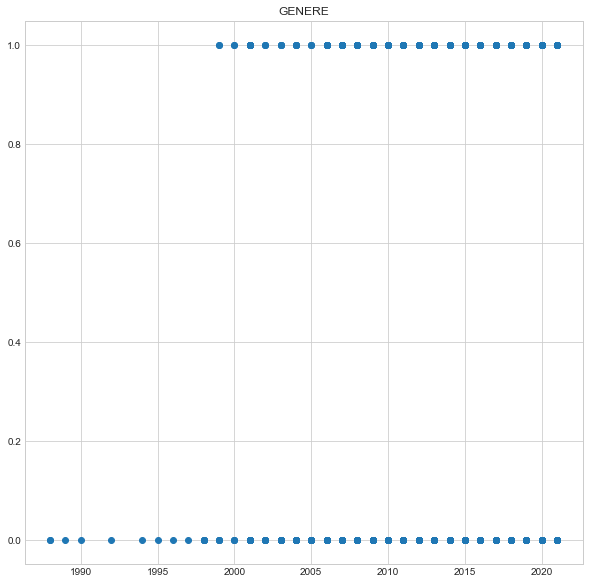

-24113.99754309971


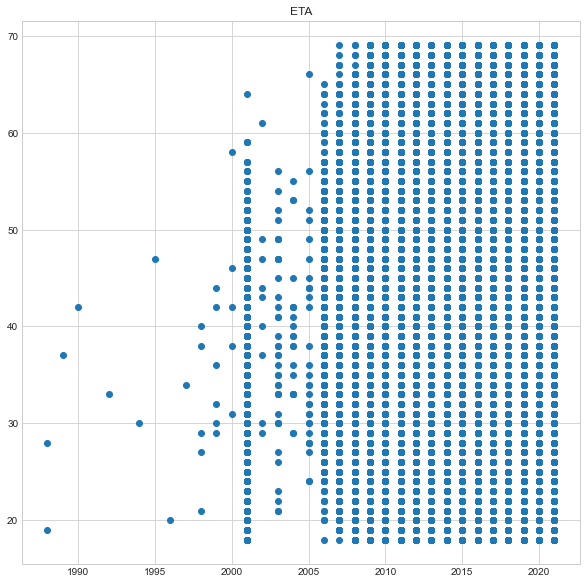

-136.5726257117335


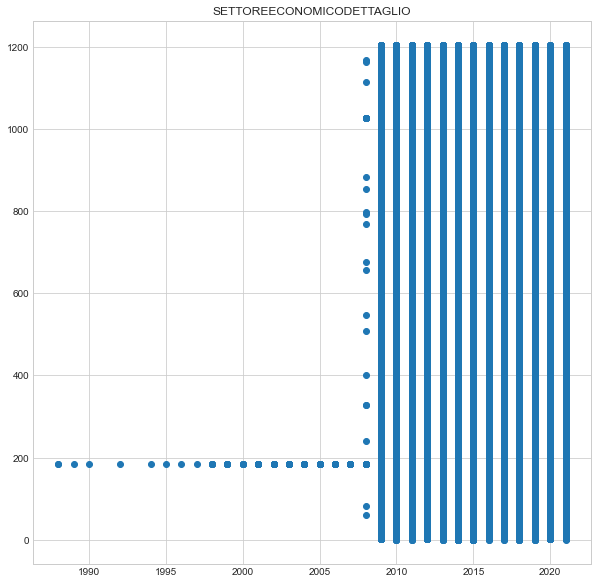

-317.9960119730867


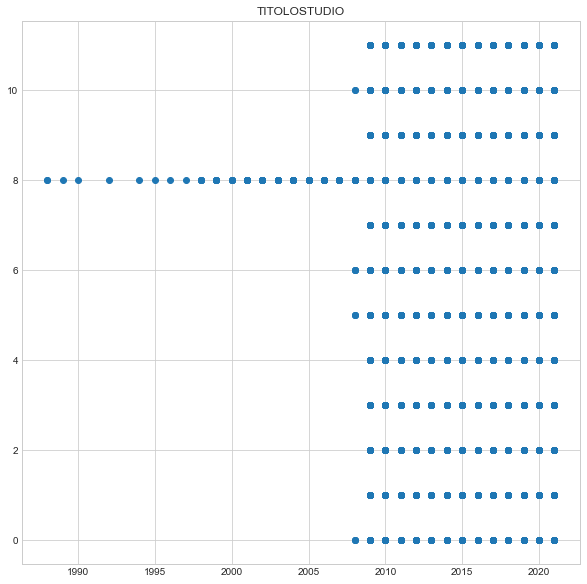

-88.34974740573897


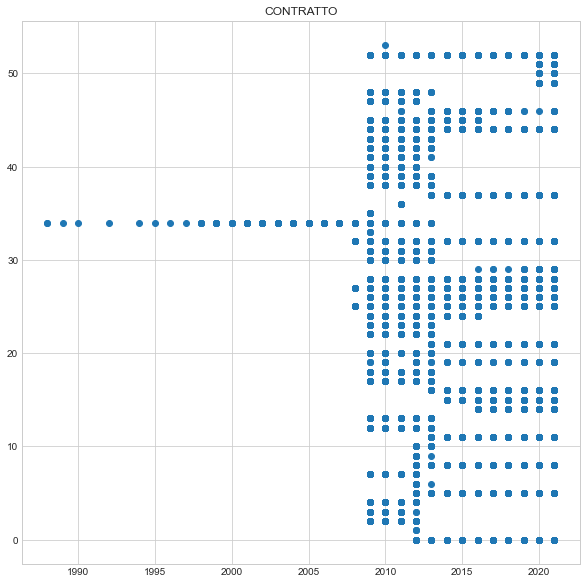

-136951.42785865886


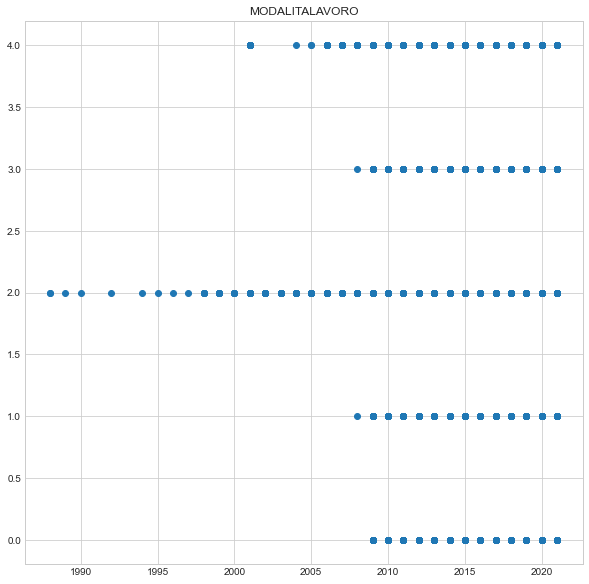

-817.7979126709464


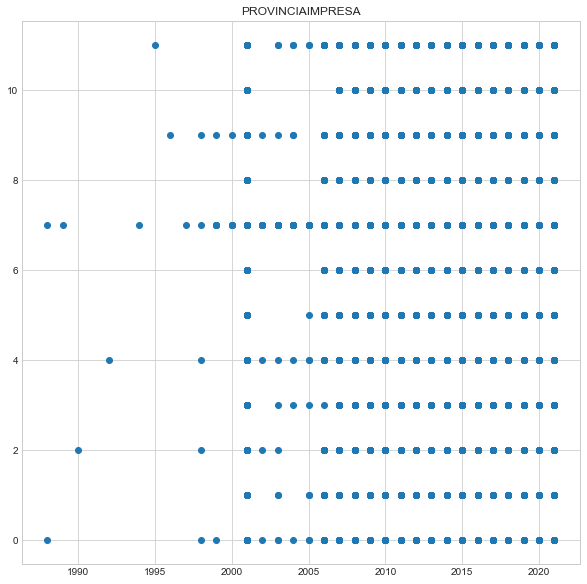

-31398.305513317504


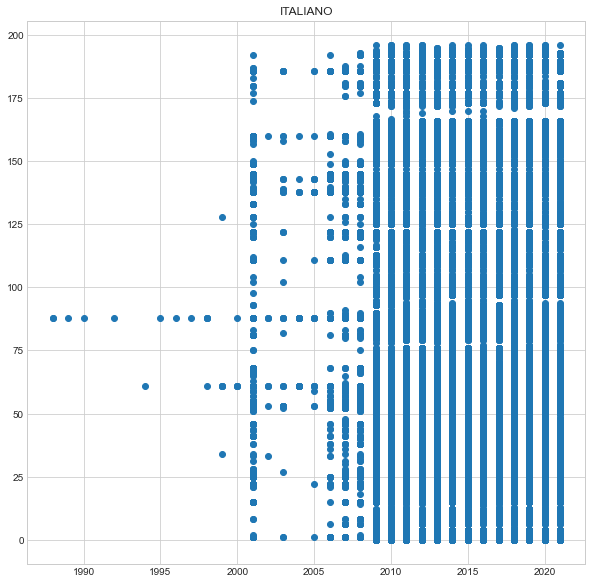

-31400.590853729755


In [240]:
def linearity(df, list_column):
    for i in list_column:
        X = df_Transform_End['YEAR']
        Y = df[i]
        plt.scatter(X,Y)
        plt.title(i)
        plt.show()
        
        regressor_linear = LinearRegression().fit(X.array.reshape(-1, 1) ,Y)
        print(r2_score(regressor_linear.predict(X.array.reshape(-1, 1) ),Y))

list_1 = ['GENERE', 'ETA','SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 'MODALITALAVORO',
          'PROVINCIAIMPRESA', 'ITALIANO']

linearity(df_Transform_End, list_1)